# Imporing Required Libraries

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Loading Fashion MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape   # 60 thousand training samples

(60000, 28, 28)

In [4]:
x_test.shape    # 10 thousand testing samples

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

#  Data Visualisation


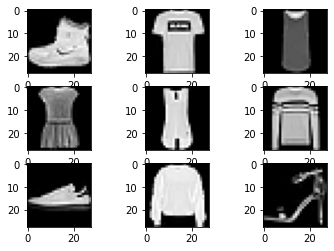

In [8]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [9]:
class_name = ["T-shirt" ,"Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt" , "Sneaker" , "Bag" , "Ankle Boot"]

In [10]:
x_train = X_train = x_train.reshape(60000,28*28)
x_test = X_test = x_test.reshape(10000,28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train[0].shape

(784,)

In [13]:
X_test.shape

(10000, 784)

In [15]:
x_test.shape

(10000, 784)

In [16]:
x_train.shape

(60000, 784)

In [14]:
class_list = []
for i in range(10):
  class_list.append([])


In [17]:
for i in range(60000):                # separating data classwise out of 60K ,  6K sample beglongs to each class
  class_list[y_train[i]].append(X_train[i])


In [18]:
len(class_list[0][0])

784

In [19]:
class_list = np.array(class_list)    # converting the list to numpy array

In [20]:
class_list.shape                     # 10 classses with 6K samples and 784 dimensions each

(10, 6000, 784)

In [21]:
class_list[0].shape                  # shape of each class

(6000, 784)

In [22]:
X_list = []                          # converted the N x D format to D x N for each class for computation
for i in range(10):
  X_list.append(class_list[i].transpose())
  
X_list = np.array(X_list)
X_list[0].shape

(784, 6000)

In [23]:
# finding scatter matrix of each class Xi

Sw = np.zeros([784,784])          # Sw matrix = S1 + S2 + S3 

for i in range(10):

  A = X_list[i] - X_list[i].mean(axis = 1, keepdims=True)
  B = A.transpose()
  S = A@B
  Sw = Sw + S

Sw.shape                        

(784, 784)

In [24]:
# finding ST matrix  Total Scatter matrix
XT = np.zeros([784,6000])

for i in range(10):
  XT = XT + X_list[i]                    # XT = X1 + X2 + X3 + X4 + .......

XT = XT - XT.mean(axis = 1 , keepdims=True)    # (XT - Ux)
XTT = XT.transpose()                           # (XT - Ux)'

ST = XT@XTT                  # ST = (XT - Ux)(XT - Ux)'         total scatter matrix

ST.shape                 

(784, 784)

In [25]:
SB = ST - Sw      # class scatter matrix = Total Scatter - Sw

SB.shape

(784, 784)

In [27]:
Temp = np.linalg.inv(Sw)   # inverse of Sw matrix 
Temp = Temp@SB
Temp.shape

(784, 784)

In [28]:
evalue, evector = np.linalg.eig(Temp) 
evector.shape

(784, 784)

In [29]:
W = evector

In [30]:
W.shape

(784, 784)

In [31]:
Y_list = []             
 
for i in range(10):
  Y_list.append(W.T@X_list[i])          # Y = W'X  new sample


In [32]:
Y_list = np.array(Y_list)
Y_list.shape

(10, 784, 6000)

In [33]:
trainX = Y_list[0].transpose()
print(trainX.shape)

for i in range(1,10):
  trainX = np.concatenate((trainX, Y_list[i].T))

trainX.shape

(6000, 784)


(60000, 784)

In [35]:
trainY = np.zeros([60000])
for i in range(10):
  for j in range(6000):
    trainY[6000*i + j] = i

trainY.shape

(60000,)

# Applying LDA on transformed data

In [38]:
lda = LDA()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [46]:
y_pred = lda.predict(x_test)
print("Accuracy => ", accuracy_score(y_test, y_pred))

Accuracy =>  0.8151


# Plotting the confusion matrix , 
# confusion matrix gives the classwise accuracy

In [53]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':10})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

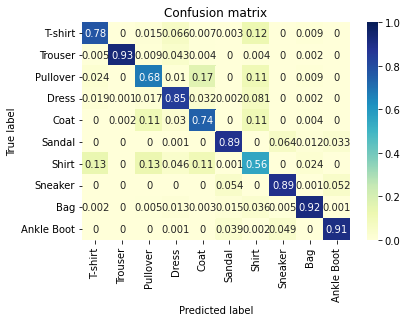

In [54]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
cm3 = confusion_matrix(y_test, y_pred)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm3, classes = class_name, title='Confusion matrix')